# Ornstein Uhlenbeck Processes


### Definition

The Ornstein-Uhlenbeck (OU for short) process satisfies the stochastic differential equation (SDE):

$$dX_t = \alpha(\gamma - X_t)d_t + \beta dW_t$$
$$dX_t = \lambda(\theta_0 - X_t)d_t + \sigma dW_t $$

The deterministic part (the drift of the process) which is the time differential term is what causes the mean reversion. When X_t is larger than γ (the asymptotic mean), the drift is negative, pulling the process back to the mean, when X_t is smaller than γ, the opposite happens. α, the mean-reversion parameter, controls the magnitude of the drift, so higher values will cause the process to mean-revert more aggressively. Finally, β controls the random shocks of the process. Note that for very high values of β, the process is, asymptotically, a rescaled Brownian motion as the drift no longer has a significant effect.

The solution to the SDE is 

$$X_t = X_0e^{-\alpha{t}} + \gamma(1-e^{-\alpha{t}}) + \beta{e^{-\alpha{t}}}\int_0^t{e^{\alpha{s}}}dW_s$$

 the distribution of the process is $N(γ, β² / 2α)$

In [2]:
from dataclasses import dataclass
from typing import Optional, Union

import numpy as np

from sklearn.linear_model import LinearRegression

import brownian_motion

@dataclass
class OUParams:
    alpha: float  # mean reversion parameter
    gamma: float  # asymptotic mean
    beta: float  # Brownian motion scale (standard deviation)

In [3]:
def get_OU_process(
    T: int,
    OU_params: OUParams,
    X_0: Optional[float] = None,
    random_state: Optional[int] = None,
) -> np.ndarray:
    """
    - T is the sample size.
    - Ou_params is an instance of OUParams dataclass.
    - X_0 the initial value for the process, if None, then X_0 is taken
        to be gamma (the asymptotic mean).
    Returns a 1D array.
    """
    t = np.arange(T, dtype=np.float128)  # float to avoid np.exp overflow
    exp_alpha_t = np.exp(-OU_params.alpha * t)
    dW = brownian_motion.get_dW(T, random_state)
    integral_W = _get_integal_W(t, dW, OU_params)
    _X_0 = _select_X_0(X_0, OU_params)
    return (
        _X_0 * exp_alpha_t
        + OU_params.gamma * (1 - exp_alpha_t)
        + OU_params.beta * exp_alpha_t * integral_W
    )


def _select_X_0(X_0_in: Optional[float], OU_params: OUParams) -> float:
    """Returns X_0 input if not none, else gamma (the long term mean)."""
    if X_0_in is not None:
        return X_0_in
    return OU_params.gamma


def _get_integal_W(
    t: np.ndarray, dW: np.ndarray, OU_params: OUParams
) -> np.ndarray:
    """Integral with respect to Brownian Motion (W), ∫...dW."""
    exp_alpha_s = np.exp(OU_params.alpha * t)
    integral_W = np.cumsum(exp_alpha_s * dW)
    return np.insert(integral_W, 0, 0)[:-1]

## Simulation process

(array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
         0.006,  0.008]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

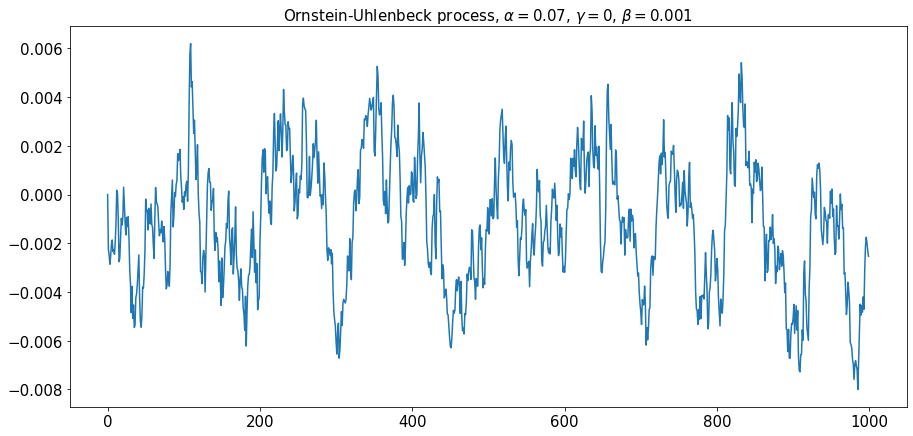

In [4]:
OU_params = OUParams(alpha=0.07, gamma=0.0, beta=0.001)
OU_proc = get_OU_process(1_000, OU_params)

#----------------------------------------------------
# plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 7))

title = "Ornstein-Uhlenbeck process, "
title += r"$\alpha=0.07$, $\gamma = 0$, $\beta = 0.001$"
plt.plot(OU_proc)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Estimation

We approximate the stochastic differential equation by a dis

## Resources

* https://towardsdatascience.com/stochastic-processes-simulation-generalized-geometric-brownian-motion-a327c0fa6226
* https://hudsonthames.org/caveats-in-calibrating-the-ou-process/